In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import dataframe_image as dfi

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string

Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
sidewalk_score = pd.read_csv("datasets/05-access-score/access-score-per-bg_20220830.csv")
sidewalk_score

,GEOID10,bg_score_sigmoid
0,530330004012,0.22348
1,530330004023,0.35434
2,530330004024,0.62880
3,530330005002,0.22705
4,530330006004,0.78456
...,...,...
358,530330111024,0.43633
359,530330112002,0.47652
360,530330114023,0.86947
361,530330116004,0.64617


In [3]:
social_factors = pd.read_csv("datasets/04-socio-economic-data/socio-economic-factors_20220905.csv")
social_factors

,Geo_FIPS,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%
0,530330001001.00000,3708.99200,0.85324,0.00000,0.01249,0.08119,0.00000,0.00000,0.05308,0.73758,0.75516,0.09697,0.14787,0.77432,2.49000,0.00000,0.08101,0.18343,0.34358,0.13222,0.17877,0.08101,0.02281,206400.00000,258515.36965,216667.00000,300456.28141,104882.00000,0.90661,0.09339,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,798900.00000,1914.00000,32.40000,1991.66667,0.02724,0.00000,0.06031,0.03891,0.06420,0.07004,0.20817,0.19455,0.18482,0.15175,0.68673,0.64742,0.03931,0.04054,0.00000,0.08722,0.00000,0.01474,0.05630,0.28148,0.37630,0.16000,0.09778,0.02815
1,530330001002.00000,14342.32000,0.50094,0.19286,0.00000,0.14903,0.00000,0.01879,0.13838,0.32985,0.75622,0.09738,0.14641,0.48919,2.14000,0.12966,0.13043,0.38432,0.18556,0.09161,0.07842,0.00000,0.08854,50714.00000,60121.48649,49583.00000,75180.93923,28358.00000,0.13784,0.86216,0.13409,0.05341,0.00000,0.07955,0.00000,0.01705,0.19091,0.52500,603800.00000,1423.00000,35.20000,1426.17555,0.07027,0.17027,0.03108,0.31351,0.16622,0.04730,0.06081,0.01892,0.06757,0.05405,0.61519,0.53549,0.07970,0.32130,0.00000,0.00000,0.02242,0.00000,0.04805,0.23247,0.19610,0.29870,0.15584,0.04286
2,530330001003.00000,10101.80000,0.60097,0.06086,0.00000,0.21508,0.00000,0.05048,0.07261,0.41895,0.75523,0.09702,0.14775,0.43062,2.05000,0.03497,0.15690,0.28450,0.29112,0.09830,0.09168,0.04253,0.01828,51397.00000,79918.31187,115508.00000,111739.20266,39294.00000,0.38627,0.61373,0.37307,0.04769,0.01543,0.01543,0.03506,0.02525,0.10098,0.38710,554900.00000,445.00000,26.80000,691.37529,0.01860,0.07010,0.15880,0.06438,0.13877,0.13019,0.21316,0.02718,0.10157,0.07725,0.64628,0.52527,0.12101,0.27128,0.00000,0.02660,0.05585,0.00000,0.06383,0.09309,0.32048,0.22074,0.26995,0.00133
3,530330001004.00000,51934.57000,0.35661,0.37594,0.00394,0.10493,0.00000,0.02091,0.13767,0.29891,0.75597,0.09610,0.14793,0.41774,2.04000,0.10406,0.23868,0.22222,0.30864,0.09759,0.01705,0.01176,0.08967,42150.00000,54727.82258,41750.00000,57814.47876,26804.00000,0.07742,0.92258,0.01431,0.01732,0.00000,0.02334,0.04217,0.26205,0.24322,0.39759,212200.00000,1333.00000,32.20000,1327.88462,0.21613,0.14597,0.05242,0.03306,0.12742,0.26774,0.04355,0.04919,0.00000,0.06452,0.67199,0.57002,0.10198,0.24962,0.00000,0.04033,0.00000,0.00000,0.05696,0.14478,0.29905,0.17563,0.21203,0.07753
4,530330001005.00000,15089.69000,0.64855,0.03500,0.00968,0.21072,0.00000,0.08637,0.00968,0.47389,0.75568,0.09628,0.14805,0.37967,1.72000,0.20287,0.21531,0.23349,0.21244,0.10813,0.00000,0.02775,0.11345,47292.00000,5835

In [4]:
#Merge datasets
social_factors = social_factors.rename(columns={'Geo_FIPS': 'GEOID10'})
df = social_factors.merge(sidewalk_score, how='inner', on='GEOID10')

In [5]:
df

,GEOID10,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%,bg_score_sigmoid
0,530330004012.00000,11124.90000,0.74428,0.00915,0.00000,0.14874,0.00000,0.01201,0.08581,0.58367,0.76860,0.11306,0.11834,0.62464,2.44000,0.10405,0.13377,0.22791,0.27415,0.23947,0.02064,0.00000,0.00000,90156.00000,100910.14493,96408.00000,127816.70534,41348.00000,0.62464,0.37536,0.40788,0.14487,0.00000,0.02532,0.08017,0.09142,0.15190,0.09845,485300.00000,1553.00000,33.10000,1545.94595,0.10435,0.02464,0.20000,0.07536,0.11594,0.13333,0.08261,0.13188,0.06232,0.06957,0.77412,0.75482,0.01930,0.12826,0.04086,0.00000,0.02497,0.00000,0.04220,0.01524,0.30950,0.29074,0.22978,0.09144,0.22348
1,530330004023.00000,11179.62000,0.91529,0.00000,0.00000,0.03518,0.00000,0.01220,0.03733,0.84054,0.84081,0.10168,0.05750,0.35147,2.05000,0.06090,0.12268,0.32215,0.34069,0.11915,0.00000,0.03442,0.08075,79706.00000,105121.17647,166146.00000,168771.96653,52293.00000,0.50588,0.49412,0.45588,0.04706,0.05588,0.00000,0.12647,0.16324,0.15147,0.00000,602400.00000,1543.00000,27.00000,1726.48810,0.02647,0.00000,0.07647,0.01765,0.16471,0.13529,0.25441,0.07500,0.09412,0.15588,0.63023,0.54035,0.08989,0.29111,0.00000,0.03882,0.03984,0.00000,0.13177,0.09295,0.28498,0.10317,0.20940,0.17773,0.35434
2,530330004024.00000,10552.88000,0.93629,0.00000,0.00000,0.05461,0.00000,0.00000,0.00910,0.87970,0.84091,0.09965,0.05944,0.55389,2.36000,0.03276,0.11724,0.19741,0.44138,0.10862,0.06897,0.03362,0.00000,133269.00000,173009.58084,163431.00000,191177.83784,71687.00000,0.50299,0.49701,0.54391,0.00000,0.00000,0.00000,0.02125,0.00000,0.08074,0.35411,636000.00000,1432.00000,35.30000,1770.48193,0.00000,0.00000,0.00000,0.20060,0.28144,0.01796,0.00000,0.13174,0.23503,0.13323,0.80057,0.61386,0.18670,0.10467,0.02546,0.04809,0.00000,0.00000,0.02168,0.25723,0.19075,0.22399,0.22399,0.06647,0.62880
3,530330005002.00000,5371.91800,0.87843,0.00000,0.00000,0.08701,0.00000,0.00000,0.03456,0.78040,0.84873,0.13503,0.01624,0.61640,2.20000,0.03254,0.16124,0.19083,0.33728,0.18195,0.07988,0.01627,0.03774,117188.00000,161148.14815,195893.00000,207129.18455,74373.00000,0.92328,0.07672,0.98293,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,763600.00000,2863.00000,16.40000,3013.79310,0.00000,0.00000,0.02646,0.00000,0.07672,0.03439,0.05026,0.30952,0.43122,0.07143,0.76339,0.65402,0.10938,0.05804,0.00000,0.00000,0.00000,0.02009,0.04244,0.20955,0.25464,0.28382,0.10080,0.10875,0.22705
4,530330006004.00000,4521.32900,0.72898,0.07231,0.00000,0.10876,0.00000,0.03410,0.05585,0.55276,0.72069,0.17035,0.10896,0.55307,2.38000,0.03929,0.15557,0.35686,0

In [6]:
#Get correlation table useing spearman rho
df_plot = df.drop(columns=['GEOID10'])
corr= df_plot.corr(method = 'spearman')
x= corr[['bg_score_sigmoid']]
x

,bg_score_sigmoid
Population Density (Per Sq. Mile),0.52483
White Alone%,-0.23099
Black or African American Alone%,0.12111
American Indian and Alaska Native Alone%,0.16269
Asian Alone%,0.23149
...,...
20 to 29 Minutes%,0.07370
30 to 39 Minutes%,-0.13878
40 to 59 Minutes%,-0.19809
60 to 89 Minutes%,-0.12719


In [7]:
#Define cmap for heatmap
norm = matplotlib.colors.Normalize(-1,1)
colors = [[norm(-1.0), "#006B76"],
          [norm(-0.3), "#088A97"],
          [norm(0), "#E0B5A4"],
          [norm(0.3), "#CF8996"],
          [norm(1.0), "#B06071"]]

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

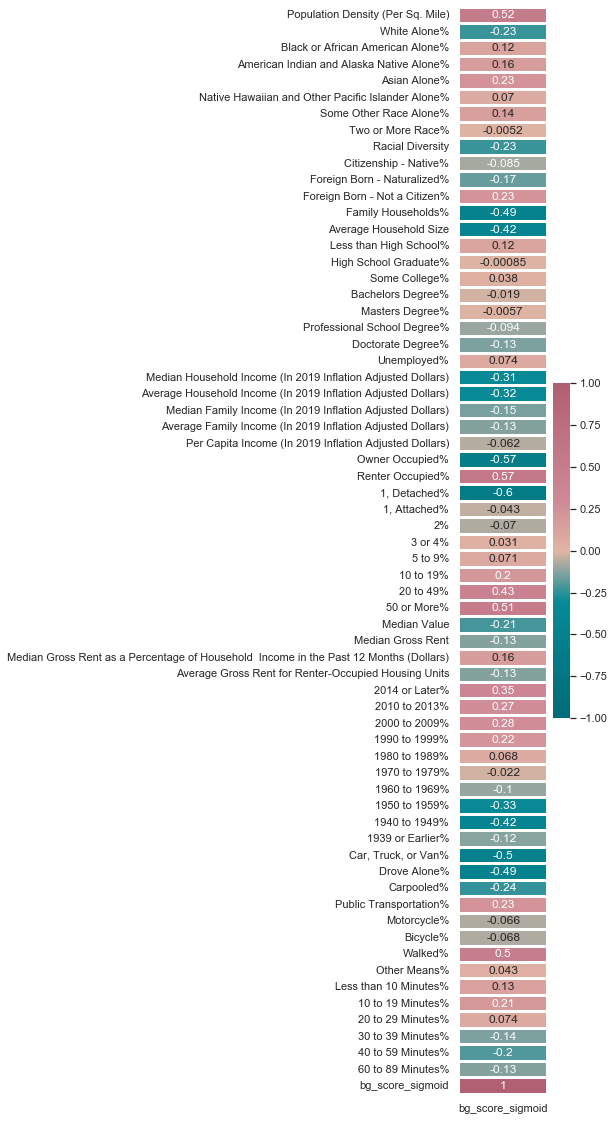

In [9]:
fig, axs = plt.subplots(figsize=(2,20))
heatmap = sns.heatmap(x, vmin=-1, vmax=1,annot=True, cmap=cmap, annot_kws={"size":12}, cbar_kws={"shrink":0.5},linewidth=2)
#heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 20)

In [22]:
df_plot = df_plot.rename(columns={"bg_score_sigmoid": "Sidewalk Accessible Score"})

In [23]:
df_plot 

,Population Density (Per Sq. Mile),White Alone%,Black or African American Alone%,American Indian and Alaska Native Alone%,Asian Alone%,Native Hawaiian and Other Pacific Islander Alone%,Some Other Race Alone%,Two or More Race%,Racial Diversity,Citizenship - Native%,Foreign Born - Naturalized%,Foreign Born - Not a Citizen%,Family Households%,Average Household Size,Less than High School%,High School Graduate%,Some College%,Bachelors Degree%,Masters Degree%,Professional School Degree%,Doctorate Degree%,Unemployed%,Median Household Income (In 2019 Inflation Adjusted Dollars),Average Household Income (In 2019 Inflation Adjusted Dollars),Median Family Income (In 2019 Inflation Adjusted Dollars),Average Family Income (In 2019 Inflation Adjusted Dollars),Per Capita Income (In 2019 Inflation Adjusted Dollars),Owner Occupied%,Renter Occupied%,"1, Detached%","1, Attached%",2%,3 or 4%,5 to 9%,10 to 19%,20 to 49%,50 or More%,Median Value,Median Gross Rent,Median Gross Rent as a Percentage of Household Income in the Past 12 Months (Dollars),Average Gross Rent for Renter-Occupied Housing Units,2014 or Later%,2010 to 2013%,2000 to 2009%,1990 to 1999%,1980 to 1989%,1970 to 1979%,1960 to 1969%,1950 to 1959%,1940 to 1949%,1939 or Earlier%,"Car, Truck, or Van%",Drove Alone%,Carpooled%,Public Transportation%,Motorcycle%,Bicycle%,Walked%,Other Means%,Less than 10 Minutes%,10 to 19 Minutes%,20 to 29 Minutes%,30 to 39 Minutes%,40 to 59 Minutes%,60 to 89 Minutes%,Sidewalk Accessible Score
0,11124.90000,0.74428,0.00915,0.00000,0.14874,0.00000,0.01201,0.08581,0.58367,0.76860,0.11306,0.11834,0.62464,2.44000,0.10405,0.13377,0.22791,0.27415,0.23947,0.02064,0.00000,0.00000,90156.00000,100910.14493,96408.00000,127816.70534,41348.00000,0.62464,0.37536,0.40788,0.14487,0.00000,0.02532,0.08017,0.09142,0.15190,0.09845,485300.00000,1553.00000,33.10000,1545.94595,0.10435,0.02464,0.20000,0.07536,0.11594,0.13333,0.08261,0.13188,0.06232,0.06957,0.77412,0.75482,0.01930,0.12826,0.04086,0.00000,0.02497,0.00000,0.04220,0.01524,0.30950,0.29074,0.22978,0.09144,0.22348
1,11179.62000,0.91529,0.00000,0.00000,0.03518,0.00000,0.01220,0.03733,0.84054,0.84081,0.10168,0.05750,0.35147,2.05000,0.06090,0.12268,0.32215,0.34069,0.11915,0.00000,0.03442,0.08075,79706.00000,105121.17647,166146.00000,168771.96653,52293.00000,0.50588,0.49412,0.45588,0.04706,0.05588,0.00000,0.12647,0.16324,0.15147,0.00000,602400.00000,1543.00000,27.00000,1726.48810,0.02647,0.00000,0.07647,0.01765,0.16471,0.13529,0.25441,0.07500,0.09412,0.15588,0.63023,0.54035,0.08989,0.29111,0.00000,0.03882,0.03984,0.00000,0.13177,0.09295,0.28498,0.10317,0.20940,0.17773,0.35434
2,10552.88000,0.93629,0.00000,0.00000,0.05461,0.00000,0.00000,0.00910,0.87970,0.84091,0.09965,0.05944,0.55389,2.36000,0.03276,0.11724,0.19741,0.44138,0.10862,0.06897,0.03362,0.00000,133269.00000,173009.58084,163431.00000,191177.83784,71687.00000,0.50299,0.49701,0.54391,0.00000,0.00000,0.00000,0.02125,0.00000,0.08074,0.35411,636000.00000,1432.00000,35.30000,1770.48193,0.00000,0.00000,0.00000,0.20060,0.28144,0.01796,0.00000,0.13174,0.23503,0.13323,0.80057,0.61386,0.18670,0.10467,0.02546,0.04809,0.00000,0.00000,0.02168,0.25723,0.19075,0.22399,0.22399,0.06647,0.62880
3,5371.91800,0.87843,0.00000,0.00000,0.08701,0.00000,0.00000,0.03456,0.78040,0.84873,0.13503,0.01624,0.61640,2.20000,0.03254,0.16124,0.19083,0.33728,0.18195,0.07988,0.01627,0.03774,117188.00000,161148.14815,195893.00000,207129.18455,74373.00000,0.92328,0.07672,0.98293,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,763600.00000,2863.00000,16.40000,3013.79310,0.00000,0.00000,0.02646,0.00000,0.07672,0.03439,0.05026,0.30952,0.43122,0.07143,0.76339,0.65402,0.10938,0.05804,0.00000,0.00000,0.00000,0.02009,0.04244,0.20955,0.25464,0.28382,0.10080,0.10875,0.22705
4,4521.32900,0.72898,0.07231,0.00000,0.10876,0.00000,0.03410,0.05585,0.55276,0.72069,0.17035,0.10896,0.55307,2.38000,0.03929,0.15557,0.35686,0.33360,0.04330,0.03609,0.03528,0.02886,58553.00000,79267.87709,58152.00000,82614.14141,33621.0

In [12]:
#Getting rho and p-value
rho = df_plot.corr(method = 'spearman')
pval = df_plot.corr(method=lambda x, y: stats.spearmanr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

In [14]:
y= p[['bg_score_sigmoid']]
y = y.rename(columns={'bg_score_sigmoid': 'pvalue'})
z = x. join(y)
z

In [20]:
#Individual correlation plots

# Population

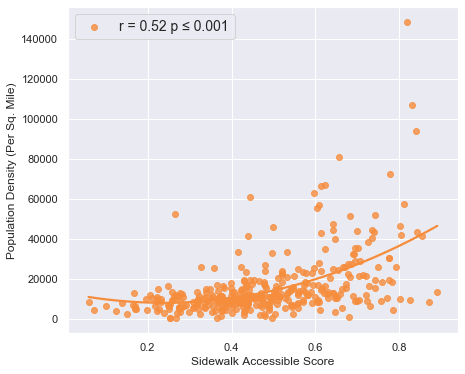

In [24]:
r, pvalue = stats.spearmanr(df_plot['Sidewalk Accessible Score'], df_plot['Population Density (Per Sq. Mile)'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    p1= sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Population Density (Per Sq. Mile)', label=f'r = {r:.2f} p ≤ 0.001',order=2, ci=None,color ="#F68D3D")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    p1= sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Population Density (Per Sq. Mile)', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

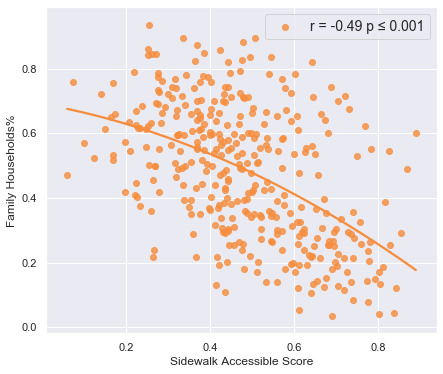

In [25]:
df_f = df_plot.dropna(subset=['Family Households%'])
r, pvalue = stats.spearmanr(df_f['Sidewalk Accessible Score'], df_f['Family Households%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    p2= sns.regplot(data=df_f, x='Sidewalk Accessible Score', y='Family Households%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#F68D3D")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    p2= sns.regplot(data=df_f, x='Sidewalk Accessible Score', y='Family Households%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

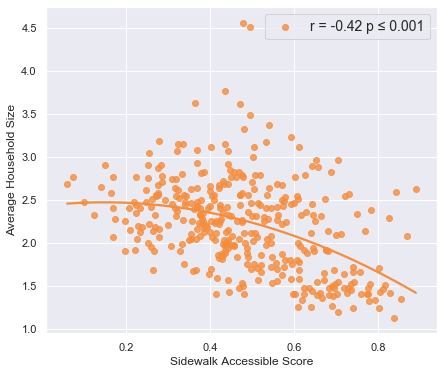

In [26]:
df_f2 = df_plot.dropna(subset=['Average Household Size'])
r, pvalue = stats.spearmanr(df_f2['Sidewalk Accessible Score'], df_f2['Average Household Size'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    p1= sns.regplot(data=df_f2, x='Sidewalk Accessible Score', y='Average Household Size', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#F68D3D")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    p1= sns.regplot(data=df_f2, x='Sidewalk Accessible Score', y='Average Household Size', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

# Race

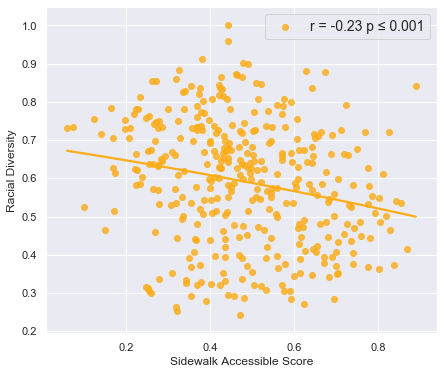

In [27]:
r, pvalue = stats.spearmanr(df_plot['Sidewalk Accessible Score'], df_plot['Racial Diversity'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    p1= sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Racial Diversity', label=f'r = {r:.2f} p ≤ 0.001',order=2, ci=None,color ="#FBAD18")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    p1= sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Racial Diversity', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

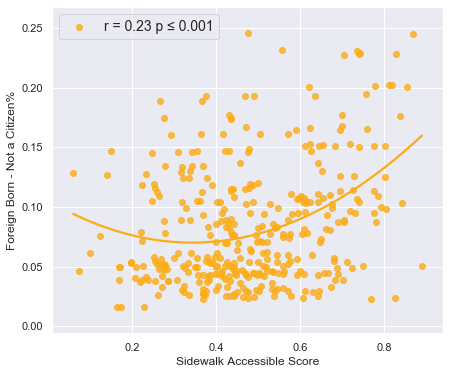

In [28]:
r, pvalue = stats.spearmanr(df_plot['Sidewalk Accessible Score'], df_plot['Foreign Born - Not a Citizen%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    p1= sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Foreign Born - Not a Citizen%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#FBAD18")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    p1= sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Foreign Born - Not a Citizen%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

# Income

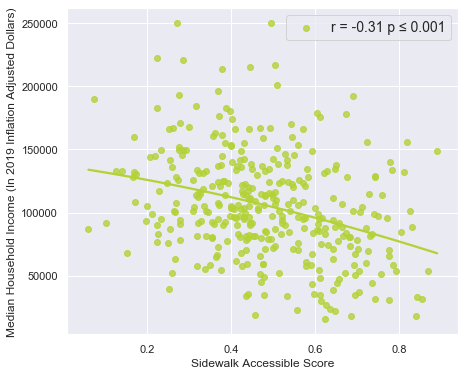

In [29]:
df_i = df_plot.dropna(subset=['Median Household Income (In 2019 Inflation Adjusted Dollars)'])
r, pvalue = stats.spearmanr(df_i['Sidewalk Accessible Score'], df_i['Median Household Income (In 2019 Inflation Adjusted Dollars)'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    sns.regplot(data=df_i, x='Sidewalk Accessible Score', y='Median Household Income (In 2019 Inflation Adjusted Dollars)', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#B2D235")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_i, x='Sidewalk Accessible Score', y='Median Household Income (In 2019 Inflation Adjusted Dollars)', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

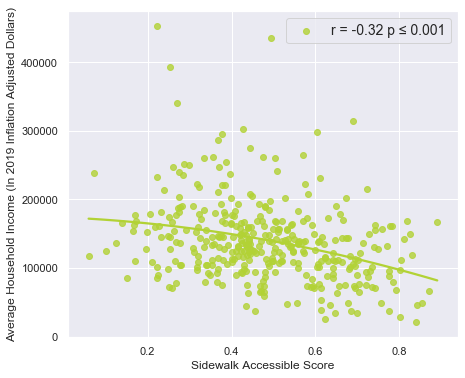

In [30]:
df_i2 = df_plot.dropna(subset=['Average Household Income (In 2019 Inflation Adjusted Dollars)'])
r, pvalue = stats.spearmanr(df_i2['Sidewalk Accessible Score'], df_i2['Average Household Income (In 2019 Inflation Adjusted Dollars)'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_i2, x='Sidewalk Accessible Score', y='Average Household Income (In 2019 Inflation Adjusted Dollars)', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#B2D235")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_i2, x='Sidewalk Accessible Score', y='Average Household Income (In 2019 Inflation Adjusted Dollars)', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

# Housing

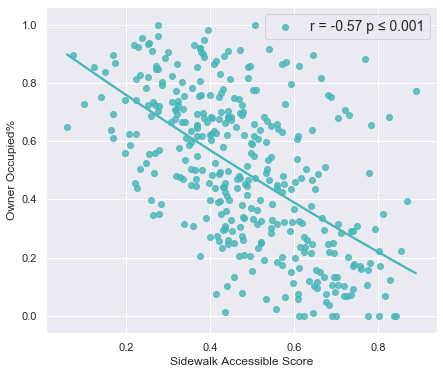

In [31]:
df_h = df_plot.dropna(subset=['Owner Occupied%'])
r, pvalue = stats.spearmanr(df_h['Sidewalk Accessible Score'], df_h['Owner Occupied%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='Owner Occupied%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#47B5B7")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='Owner Occupied%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

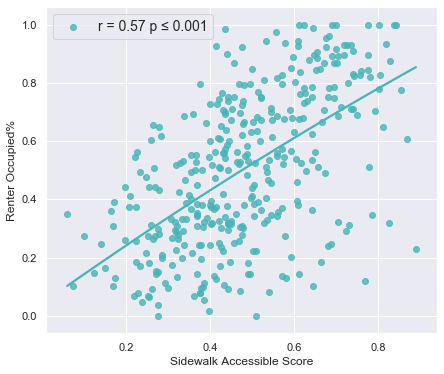

In [32]:
r, pvalue = stats.spearmanr(df_h['Sidewalk Accessible Score'], df_h['Renter Occupied%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='Renter Occupied%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#47B5B7")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='Renter Occupied%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

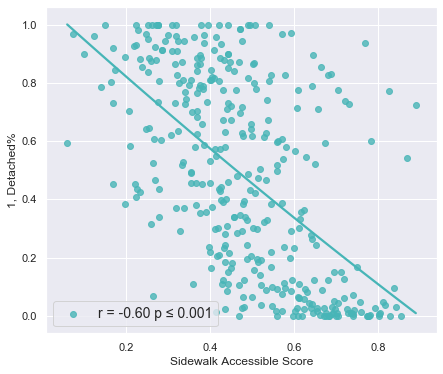

In [33]:
r, pvalue = stats.spearmanr(df_h['Sidewalk Accessible Score'], df_h['1, Detached%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='1, Detached%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#47B5B7")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='1, Detached%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

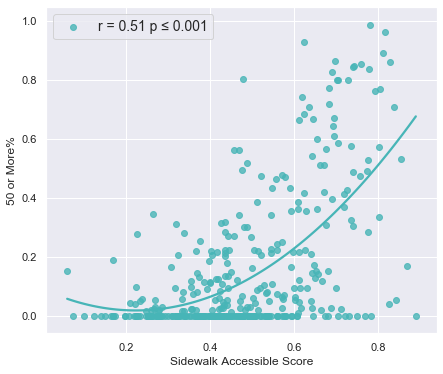

In [34]:
r, pvalue = stats.spearmanr(df_h['Sidewalk Accessible Score'], df_h['50 or More%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='50 or More%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#47B5B7")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_h, x='Sidewalk Accessible Score', y='50 or More%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

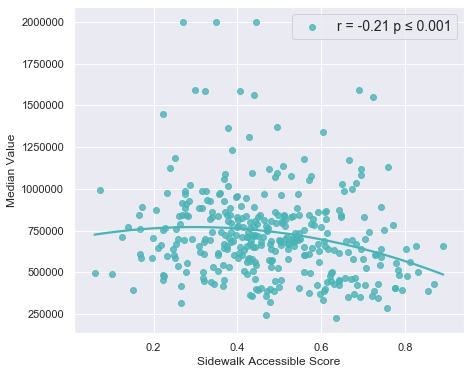

In [35]:
df_h2 = df_plot.dropna(subset=['Median Value'])
r, pvalue = stats.spearmanr(df_h2['Sidewalk Accessible Score'], df_h2['Median Value'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_h2, x='Sidewalk Accessible Score', y='Median Value', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#47B5B7")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_h2, x='Sidewalk Accessible Score', y='Median Value', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

# Transpotation

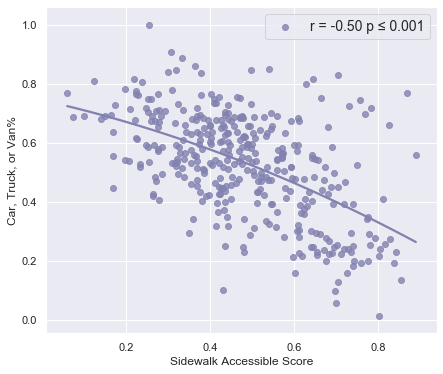

In [36]:
r, pvalue = stats.spearmanr(df_plot['Sidewalk Accessible Score'], df_plot['Car, Truck, or Van%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Car, Truck, or Van%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#8282B0")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Car, Truck, or Van%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

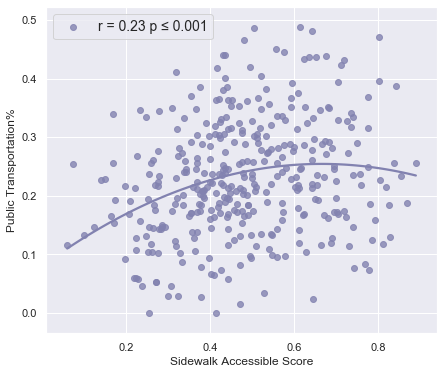

In [37]:
r, pvalue = stats.spearmanr(df_plot['Sidewalk Accessible Score'], df_plot['Public Transportation%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Public Transportation%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#8282B0")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Public Transportation%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()

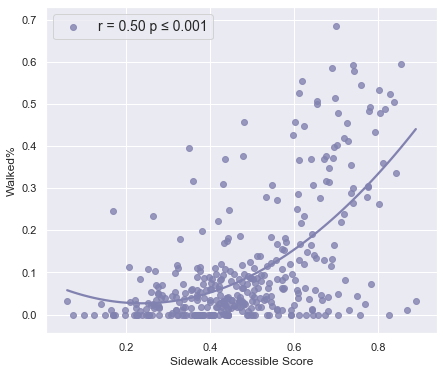

In [38]:
r, pvalue = stats.spearmanr(df_plot['Sidewalk Accessible Score'], df_plot['Walked%'])
plt.figure(figsize = (7,6))
if pvalue <= 0.001:
    ax2 = sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Walked%', label=f'r = {r:.2f} p ≤ 0.001',order=2,ci=None,color ="#8282B0")
    plt.legend(fontsize= 14)
    plt.show()
else: 
    sns.regplot(data=df_plot, x='Sidewalk Accessible Score', y='Walked%', label=f'r = {r:.2f}  p={pvalue:.3f}',order=2, ci=None)
    plt.legend()
    plt.show()